# BRIEF_SQL

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import sqlite3

In [2]:
#Read CSV in a df
df = pd.read_csv('owid-covid-data.csv')

In [3]:
#Read df
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
#Connection / Creation db
conn = sqlite3.connect('data.sqlite')
c = conn.cursor()

In [5]:
#fill db with df:
#df.to_sql('data', conn, if_exists='append', index = False)

**read Queries**

In [6]:
#classical query
c.execute("""
SELECT *
FROM data
;""")
all = c.fetchall()
all

[('AFG',
  'Asia',
  'Afghanistan',
  '2020-02-24',
  1.0,
  1.0,
  None,
  None,
  None,
  None,
  0.026000000000000002,
  0.026000000000000002,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  8.33,
  38928341.0,
  54.422,
  18.6,
  2.5810000000000004,
  1.337,
  1803.987,
  None,
  597.029,
  9.59,
  None,
  None,
  37.746,
  0.5,
  64.83,
  0.511),
 ('AFG',
  'Asia',
  'Afghanistan',
  '2020-02-25',
  1.0,
  0.0,
  None,
  None,
  None,
  None,
  0.026000000000000002,
  0.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  8.33,
  38928341.0,
  54.422,
  18.6,
  2.5810000000000004,
  1.3

pour 1 rendu plus joli...

In [7]:
#view all columns
pd.set_option('display.max_columns', None)

#Pandas SQL query
df3 = pd.read_sql_query("""
SELECT *
FROM data
LIMIT 1
;""", conn)
df3

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,None,None,None,None,0.026,0.026,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,None,597.029,9.59,None,None,37.746,0.5,64.83,0.511


## How many countries are included in our data set ?

In [8]:
#query with pandas render
df1 = pd.read_sql_query("""
SELECT COUNT(DISTINCT location)
FROM data
;""", conn)
df1

,COUNT(DISTINCT location)
0,219


## When was the most recent entry?

In [9]:
df2 = pd.read_sql_query("""
SELECT MAX(date)
FROM data
;""", conn)
df2

,MAX(date)
0,2021-05-06


## What country had the highest single day deaths per million? 

In [10]:
df3 = pd.read_sql_query("""
SELECT MAX(new_deaths_per_million), location, date
FROM data
;""", conn)
df3

,MAX(new_deaths_per_million),location,date
0,218.329,Ecuador,2020-09-07


## Select any country. How many times have the deaths per million exceeded 1,000 in one day?

In [11]:
df3 = pd.read_sql_query("""
SELECT count(1), location, new_deaths_per_million
FROM data
WHERE location = 'France' AND new_deaths_per_million > 1.000
;""", conn)
df3

,count(1),location,new_deaths_per_million
0,285,France,1.394


## Extract the deaths per million for US, France, and India. Plot the time series data and compare results to what the media is currently saying

In [12]:
df3 = pd.read_sql_query("""
SELECT total_deaths_per_million, location, date
FROM data
WHERE location IN ('France','United States', 'India')
;""", conn)
df3['date'] = pd.to_datetime(df3['date'])
df3

,total_deaths_per_million,location,date
0,NaN,France,2020-01-24
1,NaN,France,2020-01-25
2,NaN,France,2020-01-26
3,NaN,France,2020-01-27
4,NaN,France,2020-01-28
...,...,...,...
1398,1743.439,United States,2021-05-02
1399,1744.898,United States,2021-05-03
1400,1747.717,United States,2021-05-04
1401,1750.062,United States,2021-05-05


<AxesSubplot:xlabel='date', ylabel='total_deaths_per_million'>

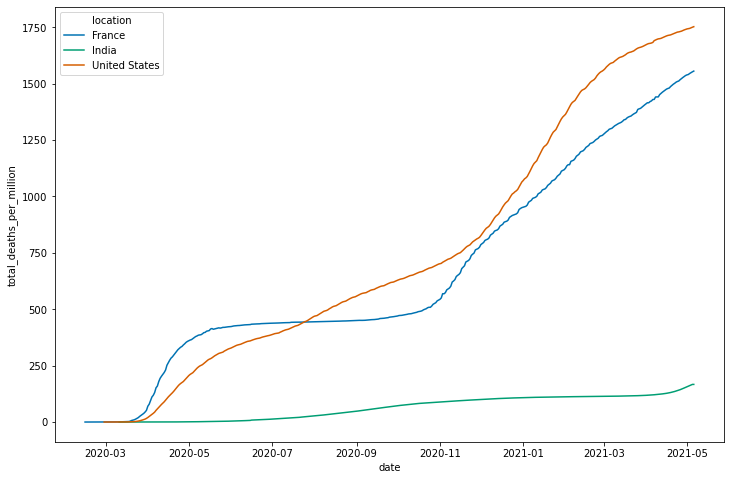

In [13]:
plt.figure(figsize = (12,8))
sns.lineplot(x="date", y="total_deaths_per_million", hue="location", data=df3)

Le niveau de mort/million en Inde est moins dramatique que la situation évoquée par les medias, vis à vis de la situation en France et aux US

## Plot the deaths per million and cases per million by continent for your birthday in 2021. What does the data say?

In [14]:
df3 = pd.read_sql_query("""
SELECT new_deaths_per_million, new_cases_per_million, date, continent
FROM data
WHERE DATE = "2021-02-14" 
AND new_deaths_per_million IS NOT NULL 
AND new_cases_per_million IS NOT NULL
AND continent IS NOT 'None'
GROUP BY continent
;""", conn)
df3

,new_deaths_per_million,new_cases_per_million,date,continent
0,0.219,7.702,2021-02-14,None
1,0.091,4.515,2021-02-14,Africa
2,0.000,0.488,2021-02-14,Asia
3,4.170,378.067,2021-02-14,Europe
4,0.000,0.000,2021-02-14,North America
5,0.000,0.078,2021-02-14,Oceania
6,1.062,93.925,2021-02-14,South America


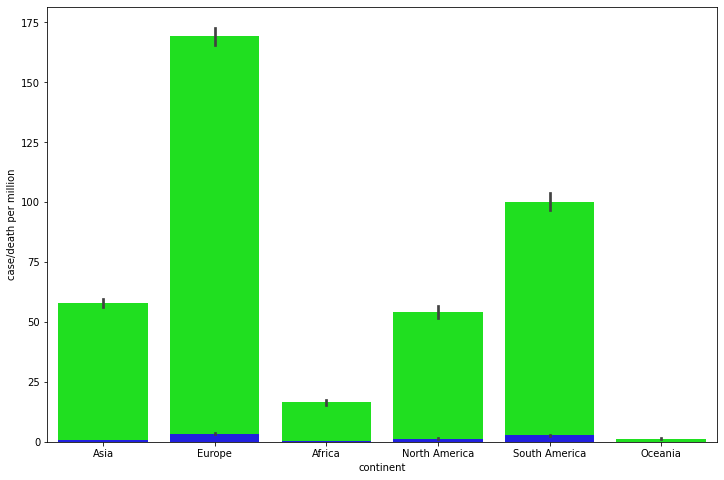

In [15]:
#plotting columns
plt.figure(figsize = (12,8))
#sns.set_theme(style="whitegrid")
ax=sns.barplot(x=df["continent"],y=df["new_cases_per_million"],color = 'lime')
ax=sns.barplot(x=df["continent"],y=df["new_deaths_per_million"],color = 'b')
  
#renaming the axes
ax.set(xlabel="continent", ylabel="case/death per million")
  
# visulaizing illustration
plt.show()

## Plot the lockdown stringency for each country and color the scatter points by continent. Any insights?

In [19]:
df5 = pd.read_sql_query("""
SELECT stringency_index, total_deaths, continent
FROM data
WHERE continent IS NOT 'None' AND stringency_index is NOT NULL
;""", conn)
df5

,stringency_index,total_deaths,continent
0,8.33,NaN,Asia
1,8.33,NaN,Asia
2,8.33,NaN,Asia
3,8.33,NaN,Asia
4,8.33,NaN,Asia
...,...,...,...
73332,51.85,1565.0,Africa
73333,51.85,1565.0,Africa
73334,51.85,1567.0,Africa
73335,51.85,1567.0,Africa


<AxesSubplot:xlabel='stringency_index', ylabel='total_deaths'>

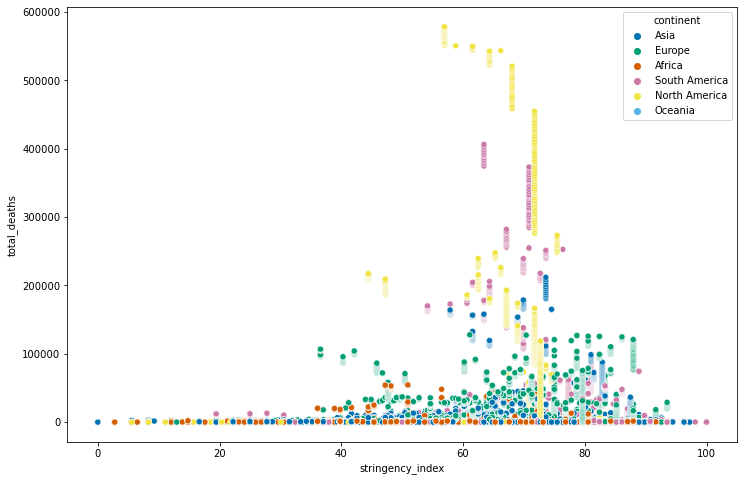

In [21]:
plt.figure(figsize = (12,8))
sns.scatterplot(x="stringency_index", y="total_deaths", hue="continent", data=df5)

## Bonus

Plot deaths per million for one country. Find Google's mobility for that country. Determine if lockdowns for that country have influenced 
deaths per million (changed the shape of the curve). Remember, you have have to create a lagged variable to account for time from
infection to death (median time ~ 15 days). Therefore, any change in policy ("lockdown") would take ~15 days to see an effect

In [18]:
df6 = pd.read_sql_query("""
SELECT date, total_deaths_per_million, location
FROM data
WHERE location = 'France'
;""", conn)
df6

,date,total_deaths_per_million,location
0,2020-01-24,NaN,France
1,2020-01-25,NaN,France
2,2020-01-26,NaN,France
3,2020-01-27,NaN,France
4,2020-01-28,NaN,France
...,...,...,...
464,2021-05-02,1540.478,France
465,2021-05-03,1545.041,France
466,2021-05-04,1548.813,France
467,2021-05-05,1552.393,France


#import deuxieme base de données

In [23]:
#Read CSV in a df
dfgoogle = pd.read_csv('Global_Mobility_Report.csv')
dfgoogle

/Users/baguidou/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248415,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-04-27,NaN,NaN,NaN,NaN,12.0,NaN
5248416,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-04-28,NaN,NaN,NaN,NaN,16.0,NaN
5248417,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-04-29,NaN,NaN,NaN,NaN,22.0,NaN
5248418,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-04-30,NaN,NaN,NaN,NaN,14.0,NaN


In [26]:
df_google = dfgoogle[dfgoogle['country_region'] == 'France']

In [29]:
df_google = df_google.drop(['country_region_code','country_region','sub_region_1','sub_region_2', 'metro_area','iso_3166_2_code','census_fips_code','place_id'],axis = 1)

In [30]:
df_google

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1867682,2020-02-15,-2.0,-1.0,23.0,12.0,-2.0,-1.0
1867683,2020-02-16,6.0,2.0,9.0,7.0,-1.0,-1.0
1867684,2020-02-17,1.0,2.0,16.0,-6.0,-15.0,4.0
1867685,2020-02-18,5.0,2.0,36.0,-4.0,-14.0,3.0
1867686,2020-02-19,-4.0,-3.0,18.0,-6.0,-12.0,2.0
...,...,...,...,...,...,...,...
1916506,2021-04-29,-39.0,1.0,-9.0,-37.0,-27.0,13.0
1916507,2021-04-30,-38.0,16.0,-8.0,-36.0,-27.0,13.0
1916508,2021-05-01,-76.0,-71.0,-43.0,-47.0,-51.0,17.0
1916509,2021-05-02,-35.0,65.0,20.0,-33.0,-6.0,5.0


In [31]:
df_google.to_sql('google', conn, if_exists='append', index = False)

In [36]:
df6 = pd.read_sql_query("""
SELECT retail_and_recreation_percent_change_from_baseline, data.date, location, total_deaths_per_million
FROM data
INNER JOIN google ON data.date = google.date
WHERE location = 'France'
;""", conn)
df6

,retail_and_recreation_percent_change_from_baseline,date,location,total_deaths_per_million
0,-20.0,2020-02-15,France,0.015
1,-15.0,2020-02-15,France,0.015
2,-15.0,2020-02-15,France,0.015
3,-13.0,2020-02-15,France,0.015
4,-13.0,2020-02-15,France,0.015
...,...,...,...,...
48824,-11.0,2021-05-03,France,1545.041
48825,-11.0,2021-05-03,France,1545.041
48826,-11.0,2021-05-03,France,1545.041
48827,-8.0,2021-05-03,France,1545.041
